<a href="https://colab.research.google.com/github/ankitadalvi585/Python/blob/main/Statistical_Analysis_InsuranceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Hypothesis Testing : T-test, ANOVA, Chi-square Distribution***

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from google.colab import drive

#Importing Data from drive
drive.mount('/content/drive')
file_path = ('/content/drive/My Drive/Health_insurance.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data=pd.read_csv(file_path)

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age > Age of the person

sex > male or female

bmi > BMI of the person

children > No of children

smoker > If the person smokes or not

region > residing region for the person (southeast, southwest, northeast, northwest)

charges > medical cost

In [23]:
#Shape of the data
data.shape

(1338, 7)

In [24]:
#Datatype of each column
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [25]:
#Basic Stats of the data
data.describe().astype(int)

,age,bmi,children,charges
count,1338,1338,1338,1338
mean,39,30,1,13270
std,14,6,1,12110
min,18,15,0,1121
25%,27,26,0,4740
50%,39,30,1,9382
75%,51,34,2,16639
max,64,53,5,63770


<ipython-input-39-08c2630bc336>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi)
<ipython-input-39-08c2630bc336>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)
<ipython-input-39-08c2630bc336>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

Text(0.5, 1.0, 'Charges Distribution')

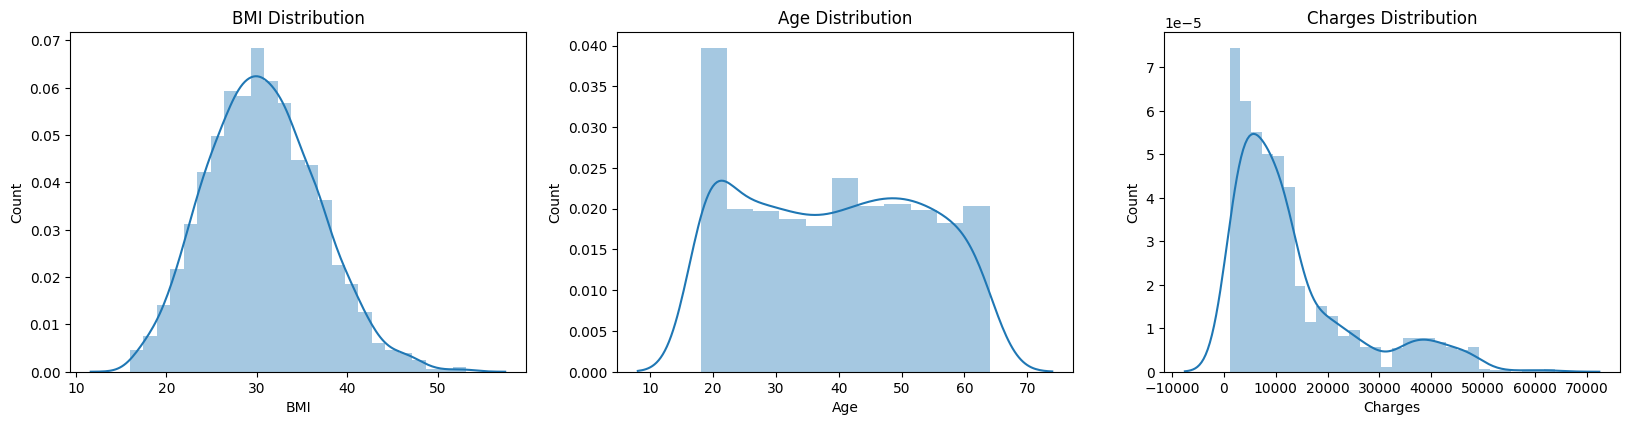

In [39]:
#Distribution of the Data for BMI, Age and Charges

#BMI
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
#plt.hist(data['bmi'])
sns.distplot(data.bmi)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')

#AGE
plt.subplot(3,3,2)
#plt.hist(data['age'])
sns.distplot(data.age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

#Charges
plt.subplot(3,3,3)
#plt.hist(data['charges'])
sns.distplot(data.charges)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Charges Distribution')


BMI > Normal Distribution

Age > Uniform Distribution with skewness

Charges > Right/Positive Skewed Distribution

In [27]:
#To check skewness of the data
pd.DataFrame({'Skewness':[stats.skew(data['bmi']),stats.skew(data['age']),stats.skew(data['charges'])]},index=['BMI','Age','Charges'])

,Skewness
BMI,0.283729
Age,0.055610
Charges,1.514180


In [29]:
#To check if any Null value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

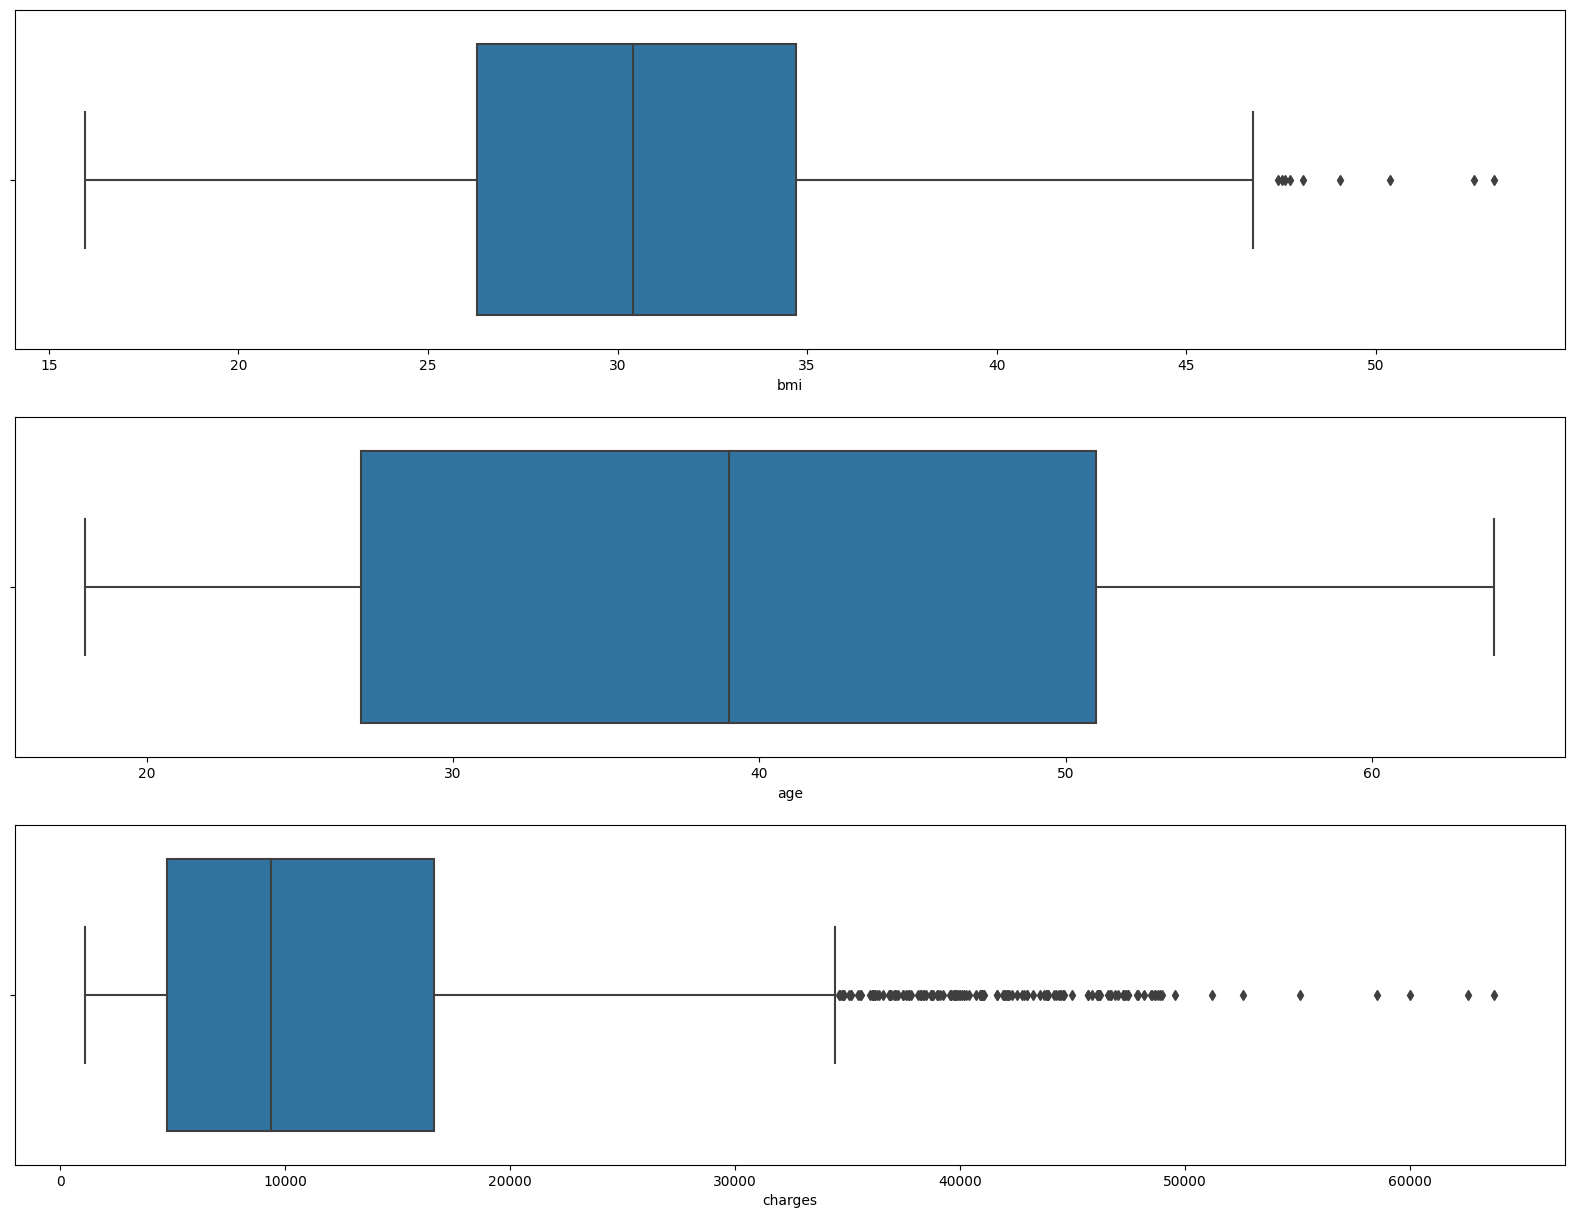

In [30]:
#Outlier detection

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=data['bmi'])

plt.subplot(3,1,2)
sns.boxplot(x=data['age'])

plt.subplot(3,1,3)
sns.boxplot(x=data['charges'])
plt.show()

BMI > Outliers present

Age > No Outliers

Charges > Lot of Outliers present

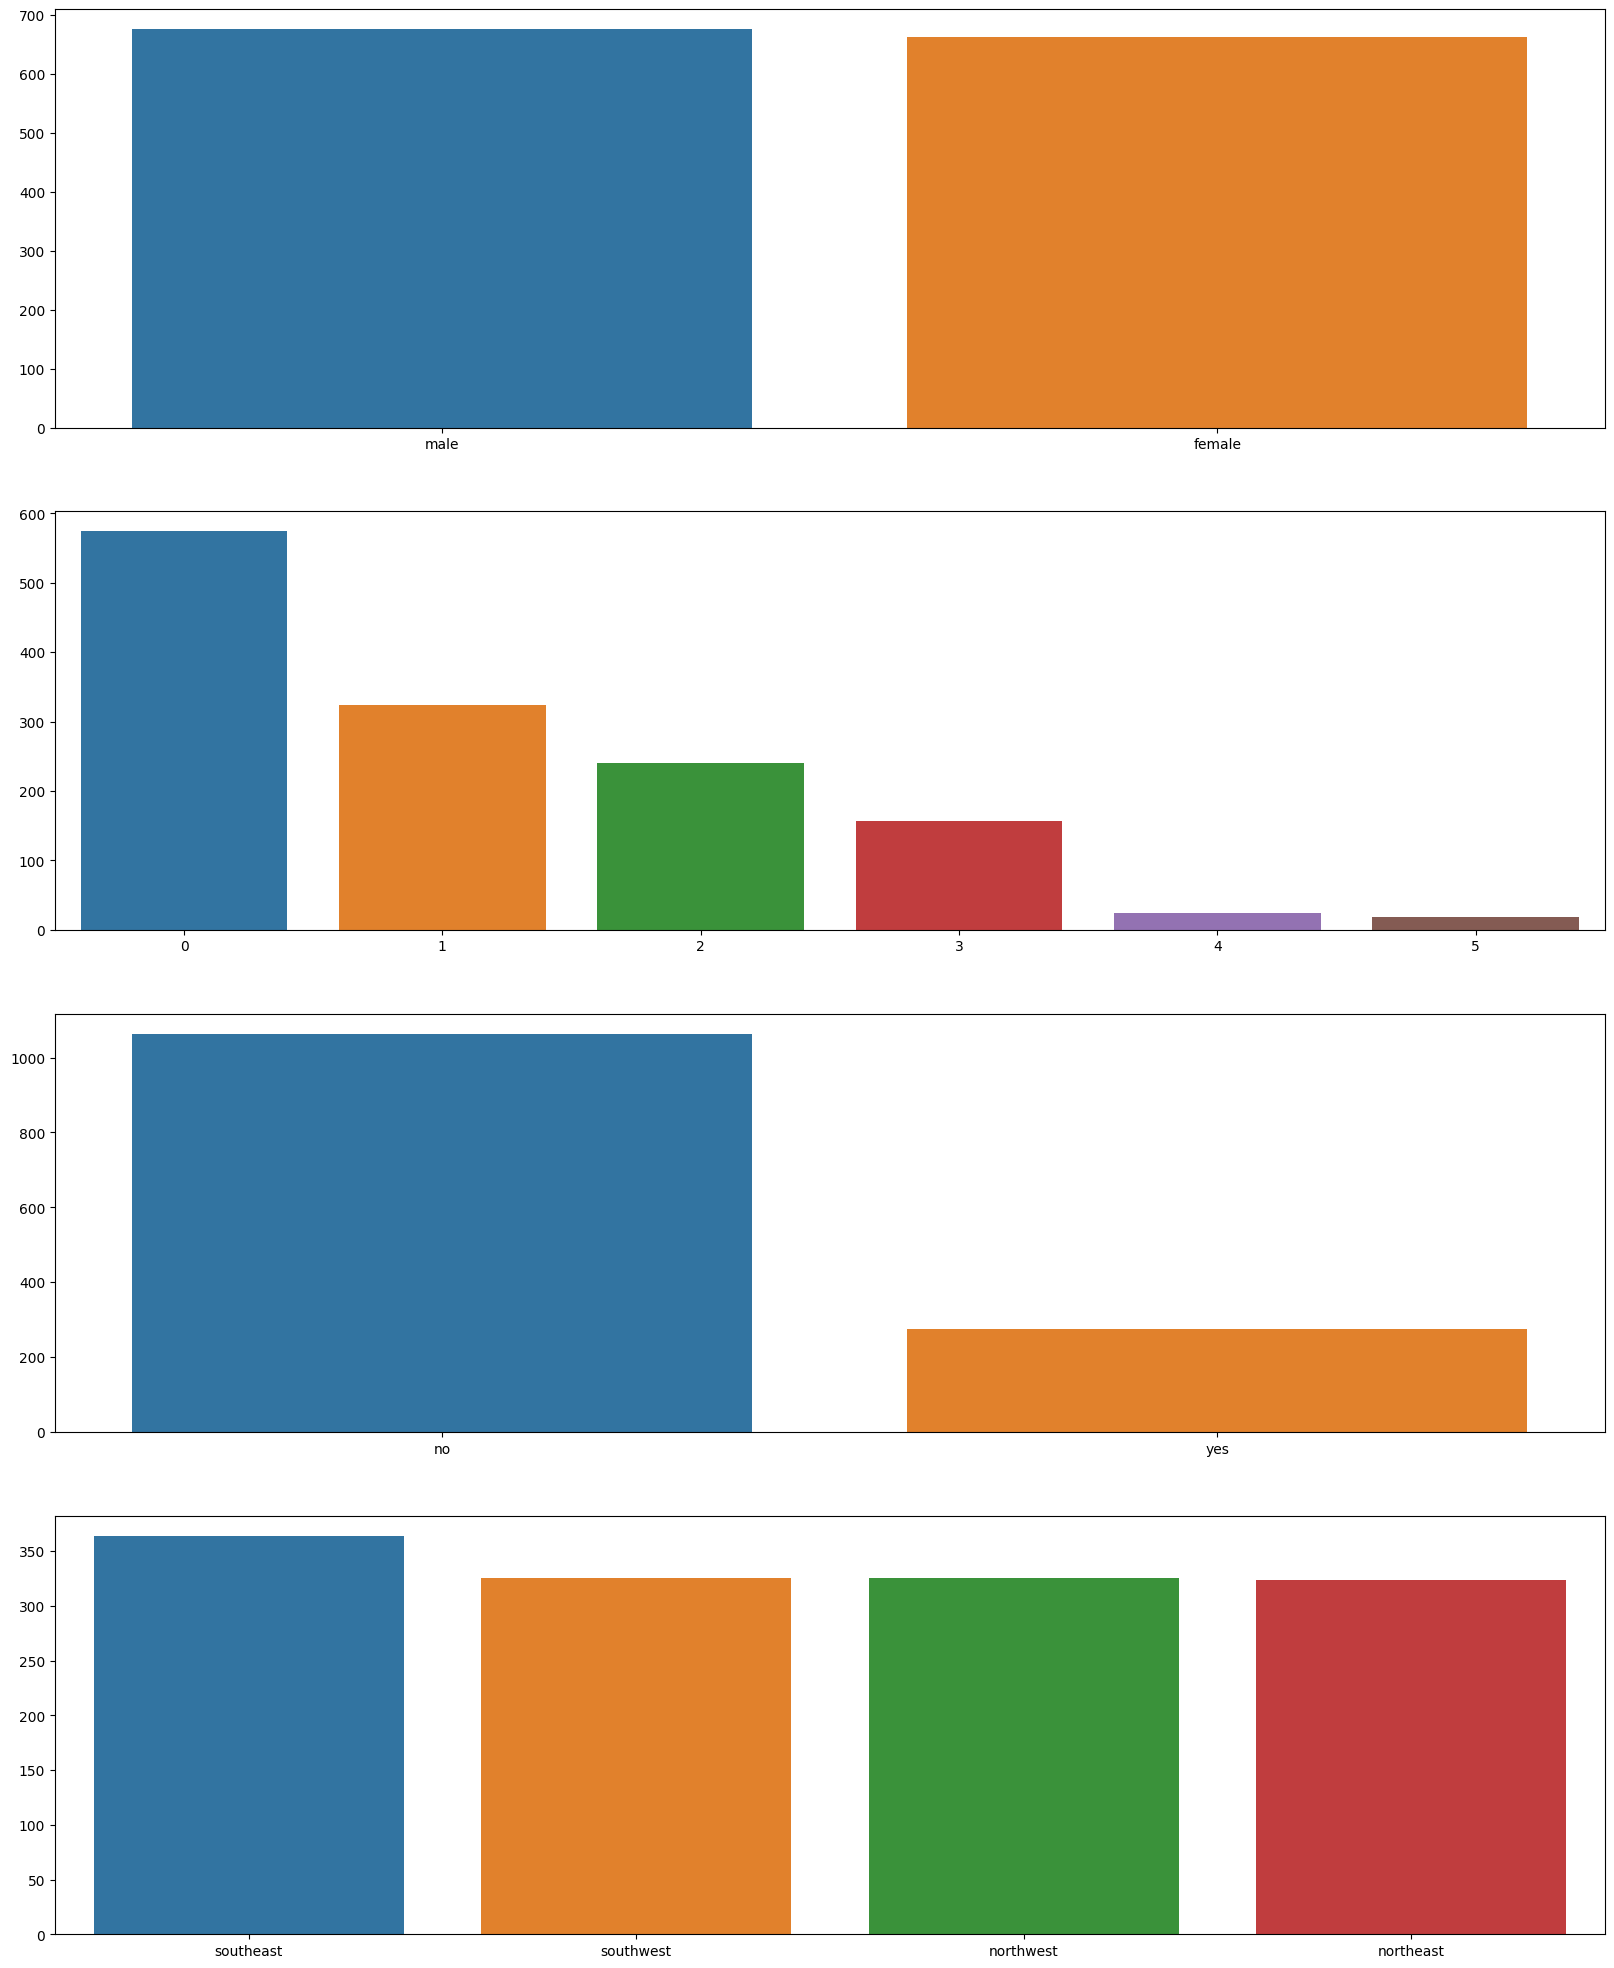

In [31]:
plt.figure(figsize= (20,25))
plt.subplot(4,1,1)
sns.barplot(x=data['sex'].value_counts().index,y=data['sex'].value_counts().values)

plt.subplot(4,1,2)
sns.barplot(x=data['children'].value_counts().index,y=data['children'].value_counts().values)

plt.subplot(4,1,3)
sns.barplot(x=data['smoker'].value_counts().index,y=data['smoker'].value_counts().values)

plt.subplot(4,1,4)
sns.barplot(x=data['region'].value_counts().index,y=data['region'].value_counts().values)
plt.show()

In [33]:
data_new = data.copy()

In [34]:
#data['region'].value_counts().index
region = {'southeast': 0, 'southwest': 1, 'northeast':2,'northwest': 3}

In [35]:
data_new['sex']=data_new['sex'].apply(lambda x :1 if x=='male' else 0)
data_new['region']=data_new['region'].map(region)
data_new['smoker']=data_new['smoker'].apply(lambda x :1 if x=='yes' else 0)

In [36]:
data_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [42]:
corr_matrix=data_new.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.005212,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.016121,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.261829,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.019257,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.053930,0.787251
region,0.005212,-0.016121,-0.261829,0.019257,-0.053930,1.000000,-0.056993
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.056993,1.000000


<Axes: >

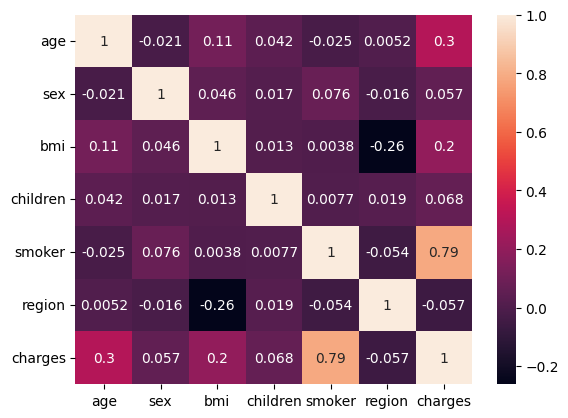

In [44]:
sns.heatmap(corr_matrix, annot = True)

Strong correlation exists between Smoker and Charges

***Hypothesis Test 1 : Do charges of people who smoke differ significantly from the people who don't smoke?***

A t-test is a statistical test that compares the means of two samples.

In [45]:
data_new['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

<Axes: xlabel='age', ylabel='charges'>

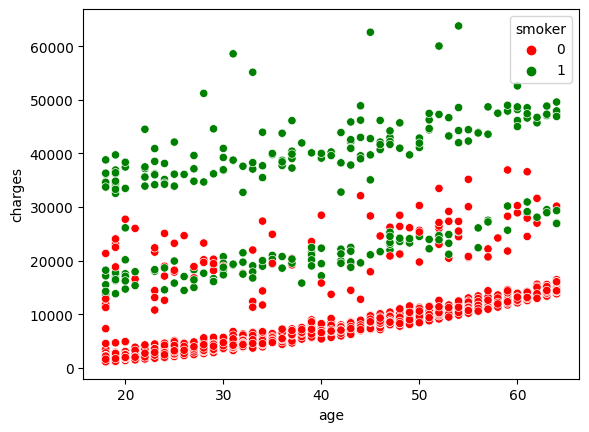

In [46]:
sns.scatterplot(x=data_new['age'],y=data_new['charges'],hue=data_new['smoker'],palette=['red','green'])

Hypothesis to be tested is as below:

Do charges of people who smoke differ significantly from the people who don't smoke?

H0: Charges for smoker and non-smoker are the same

H1: Charges for smoker and non-smoker are not the same


In [57]:
H0 = 'Charges for smoker and non-smoker are the same'
H1 = 'Charges for smoker and non-smoker are not the same'
x = np.array(data_new[data_new['smoker']==1]['charges'])
y = np.array(data_new[data_new['smoker']==0]['charges'])
t_value,p_value = stats.ttest_ind(x,y)
#print(t_value,p_value)
if p_value <= 0.05:
  print('{} because we reject the Null Hypothesis as p_value for the t-test ({}) <= 0.05'.format(H1,p_value))
else:
  print('{} because we fail to reject the Null Hypothesis as p_value for the t-test ({}) >= 0.05'.format(H0,p_value))

Charges for smoker and non-smoker are not the same because we reject the Null Hypothesis as p_value for the t-test (8.271435842179102e-283) <= 0.05


Conclusion: Charges differ for Smokers and Non-smokers

***Hypothesis Test 2 : Does BMI of males differ significantly from females?***

In [54]:
data_new['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='bmi'>

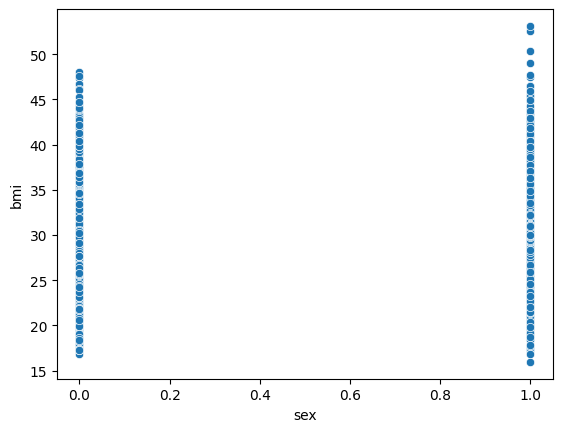

In [55]:
sns.scatterplot(x=data_new['sex'],y=data_new['bmi'])

Hypothesis to be tested is as below:

Does BMI of males differ significantly from females?

H0: There is no difference between BMI for males and females

H1: BMI for males and females differ significantly

In [59]:
H0='There is no difference between BMI for males and females'
H1='BMI for males and females differ significantly'
x=np.array(data_new[data_new['sex']==1]['bmi'])
y=np.array(data_new[data_new['sex']==0]['bmi'])
t_value,p_value=stats.ttest_ind(x,y)
#t-test is to identify the idfference between two numerical variable
#print(t_value,p_value)

if p_value<=0.05:
  print('{} because we reject the Null Hypothesis as p_value for the t-test ({}) <= 0.05'.format(H1,p_value))
else:
  print('{} because we fail to reject the Null Hypothesis as p_value for the t-test ({}) >= 0.05'.format(H0,p_value))

There is no difference between BMI for males and females because we fail to reject the Null Hypothesis as p_value for the t-test (0.08997637178984932) >= 0.05


Conclusion: Gender has no effect on BMI

***Hypothesis Test 3 : Does number of children has an effect on BMI?***

ANOVA, which stands for Analysis of Variance, is a statistical test used to analyze the difference between the means of more than two groups.

In [65]:
data_new['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [70]:
H0 = "No. of children has no effect on BMI"
Ha = "No. of children has an effect on BMI"

female_data = data_new[data_new['sex'] ==0].copy()

zero_child = female_data[female_data['children'] == 0]['bmi']
one_child = female_data[female_data['children'] == 1]['bmi']
two_child = female_data[female_data['children'] == 2]['bmi']
three_child = female_data[female_data['children'] == 3]['bmi']
four_child = female_data[female_data['children'] == 4]['bmi']
five_child = female_data[female_data['children'] == 5]['bmi']

f_stat, p_value = stats.f_oneway(zero_child,one_child,two_child,three_child,four_child,five_child)

#print(f_stat, p_value)

if p_value<=0.05:
  print('{} because we reject the Null Hypothesis as p_value for the t-test ({}) <= 0.05'.format(H1,p_value))
else:
  print('{} because we fail to reject the Null Hypothesis as p_value for the t-test ({}) >= 0.05'.format(H0,p_value))

No. of children has no effect on BMI because we fail to reject the Null Hypothesis as p_value for the t-test (0.918622806533995) >= 0.05


Conclusion: No. of children has no effect on BMI

***Hypothesis Test 4 : Is the proportion of smokers significantly different for male and female?***

Chi-square test is a hypothesis test designed to test for a statistically significant relationship between nominal/ordinal variables

In [60]:
freq_data = pd.crosstab(data_new['sex'],data_new['smoker'])
freq_data

smoker,0,1
sex,,
0,547,115
1,517,159


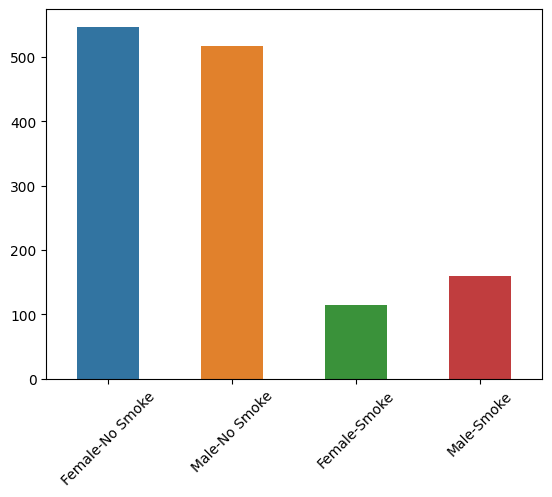

In [62]:
Groups=['Female-No Smoke','Male-No Smoke','Female-Smoke','Male-Smoke']
counts=freq_data.loc[:,0].tolist()+freq_data.loc[:,1].tolist()
sns.barplot(x=Groups,y=counts,width=0.5)
plt.xticks(rotation=45)
plt.show()

Chi-square test is used to compare categorical variables.

We use it to identify the difference between Gender and Smoking habits

In [72]:
from scipy.stats.distributions import chi2
H0 = "Gender has no effect on smoking habits"
H1 = "Gender has significant effect on smoking habits"
chi,p_value,dof, expected = stats.chi2_contingency(freq_data)
#print(chi,p_value,dof, expected)
if p_value <= 0.05:
  print('{} because we reject the Null Hypothesis as p_value for the t-test ({}) <= 0.05'.format(H1,p_value))
else:
  print('{} because we fail to reject the Null Hypothesis as p_value for the t-test ({}) >= 0.05'.format(H0,p_value))

Gender has significant effect on smoking habits because we reject the Null Hypothesis as p_value for the t-test (0.006548143503580696) <= 0.05


Conclusion: Gender has an effect on Smoking habits